# Red Wine Quality Prediction

### Preliminary work

In [29]:
# Importing the necessary packages/libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import mglearn 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Glance at the Data

In [30]:
# Importing the dataset
data=pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
# Looking at the data
print(data.shape)

(1599, 12)


In [12]:
print(list(data.columns))

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [31]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 11].values

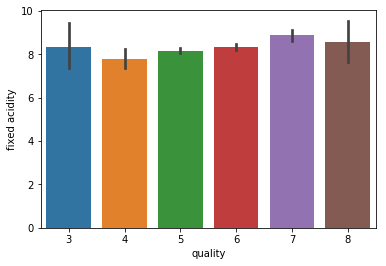

In [21]:
sns.barplot(x='quality',y='fixed acidity',data=data)

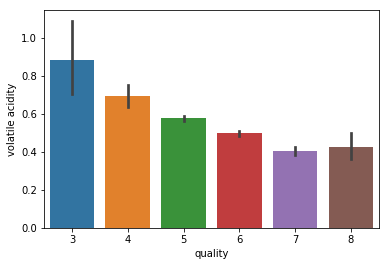

In [22]:
sns.barplot(x='quality',y='volatile acidity',data=data)

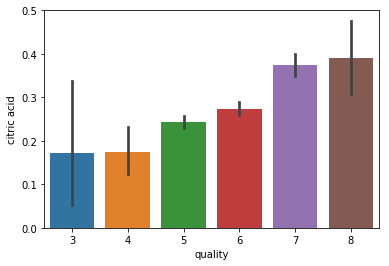

In [23]:
sns.barplot(x='quality',y='citric acid',data=data)

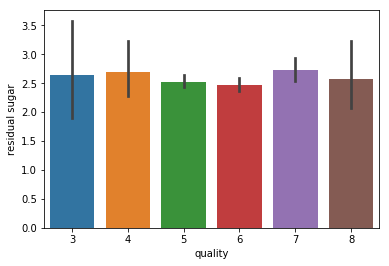

In [25]:
sns.barplot(x='quality',y='residual sugar',data=data)

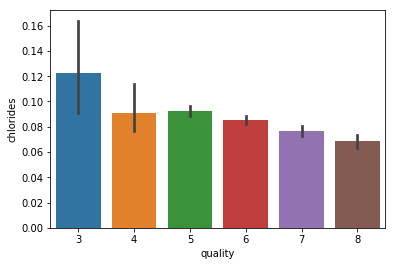

In [26]:
sns.barplot(x='quality',y='chlorides',data=data)

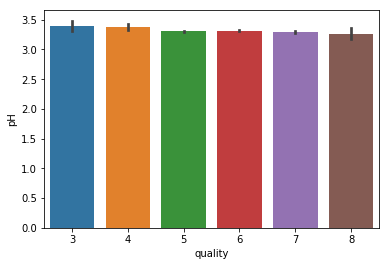

In [27]:
sns.barplot(x='quality',y='pH',data=data)

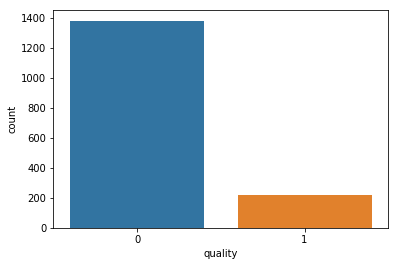

In [46]:
sns.countplot(data['quality'])

### Binarizing the target values

In [32]:
for i in range(len(data)):
    if data.iloc[i,11]>=7:
        data.iloc[i,11]=1
    else:
        data.iloc[i,11]=0
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


### Getting into Machine learning

In [33]:
# Scaling the input variable
sc=StandardScaler()
X=sc.fit_transform(X[:,:])

In [34]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

# Building the models

In [35]:
# Naive Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)
# Final Prediction
y_pred=np.matrix.round(nb.predict(X_test))
acc=accuracy_score(y_test, y_pred)
print("accuracy: ",acc*100,'%' )
print("\n Classification report:\n{}".format(classification_report(y_test, y_pred)))


accuracy:  83.0 %

 Classification report:
              precision    recall  f1-score   support

           0       0.96      0.84      0.90       355
           1       0.37      0.76      0.50        45

   micro avg       0.83      0.83      0.83       400
   macro avg       0.67      0.80      0.70       400
weighted avg       0.90      0.83      0.85       400



In [37]:
# KNN model (for k=4)
knn = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
#X = cv.fit_transform(corpus).toarray()
knn.fit(X_train, y_train)
# Final Prediction
y_pred=np.matrix.round(knn.predict(X_test))
acc=accuracy_score(y_test, y_pred)
print("accuracy: ",acc*100,'%' )
print("\n Classification report:\n{}".format(classification_report(y_test, y_pred)))

accuracy:  90.25 %

 Classification report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       355
           1       0.60      0.40      0.48        45

   micro avg       0.90      0.90      0.90       400
   macro avg       0.76      0.68      0.71       400
weighted avg       0.89      0.90      0.89       400



In [11]:
# KNN model (for k=5)
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
#X = cv.fit_transform(corpus).toarray()
knn.fit(X_train, y_train)
# Final Prediction
y_pred=np.matrix.round(knn.predict(X_test))
acc=accuracy_score(y_test, y_pred)
print("accuracy: ",acc*100,'%' )

accuracy:  88.25 %


In [12]:
# KNN model (for k=3)
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
#X = cv.fit_transform(corpus).toarray()
knn.fit(X_train, y_train)
# Final Prediction
y_pred=np.matrix.round(knn.predict(X_test))
acc=accuracy_score(y_test, y_pred)
print("accuracy: ",acc*100,'%' )

accuracy:  89.5 %


In [13]:
# KNN model (for k=6)
knn = KNeighborsClassifier(n_neighbors = 6, metric = 'minkowski', p = 2)
#X = cv.fit_transform(corpus).toarray()
knn.fit(X_train, y_train)
# Final Prediction
y_pred=np.matrix.round(knn.predict(X_test))
acc=accuracy_score(y_test, y_pred)
print("accuracy: ",acc*100,'%' )

accuracy:  89.75 %


# #Logistic Regression

In [38]:
# Logistic Regression model
lg = LogisticRegression()
lg.fit(X_train,y_train)
# Final Prediction
y_pred=np.matrix.round(lg.predict(X_test))
acc=accuracy_score(y_test, y_pred)
print("accuracy: ",acc*100,'%' )
print("\n Classification report:\n{}".format(classification_report(y_test, y_pred)))

accuracy:  89.5 %

 Classification report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       355
           1       0.55      0.38      0.45        45

   micro avg       0.90      0.90      0.90       400
   macro avg       0.74      0.67      0.69       400
weighted avg       0.88      0.90      0.89       400



In [15]:
# Logistic Regression model
lg = LogisticRegression(C=10)
lg.fit(X_train,y_train)
# Final Prediction
y_pred=np.matrix.round(lg.predict(X_test))
acc=accuracy_score(y_test, y_pred)
print("accuracy: ",acc*100,'%' )

accuracy:  89.25 %


C:\Users\sukha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [16]:
# Logistic Regression model
lg = LogisticRegression(C=0.001)
lg.fit(X_train,y_train)
# Final Prediction
y_pred=np.matrix.round(lg.predict(X_test))
acc=accuracy_score(y_test, y_pred)
print("accuracy: ",acc*100,'%' )

accuracy:  88.25 %


C:\Users\sukha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


# Random Forest

In [39]:
# Random Forest model
rfr = RandomForestRegressor(n_estimators=40,random_state=0)
rfr.fit(X_train,y_train)
# Final Prediction
y_pred=np.matrix.round(rfr.predict(X_test))
acc=accuracy_score(y_test, y_pred)
print("accuracy: ",acc*100,'%' )
print("\n Classification report:\n{}".format(classification_report(y_test, y_pred)))

accuracy:  91.5 %

 Classification report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       355
           1       0.63      0.60      0.61        45

   micro avg       0.92      0.92      0.92       400
   macro avg       0.79      0.78      0.78       400
weighted avg       0.91      0.92      0.91       400



In [18]:
# Random Forest model
rfr = RandomForestRegressor(n_estimators=35,max_depth=5,max_leaf_nodes=5,random_state=0)
rfr.fit(X_train,y_train)
# Final Prediction
y_pred=np.matrix.round(rfr.predict(X_test))
acc=accuracy_score(y_test, y_pred)
print("accuracy: ",acc*100,'%' )

accuracy:  91.25 %


# Decision tree classifier

In [41]:

tree= DecisionTreeClassifier()
tree.fit(X_train,y_train)
# Final Prediction
y_pred=np.matrix.round(tree.predict(X_test))
acc=accuracy_score(y_test, y_pred)
print("accuracy: ",acc*100,'%' )

accuracy:  89.0 %


In [20]:

tree= DecisionTreeClassifier(max_depth=6)
tree.fit(X_train,y_train)
# Final Prediction
y_pred=np.matrix.round(tree.predict(X_test))
acc=accuracy_score(y_test, y_pred)
print("accuracy: ",acc*100,'%' )

accuracy:  91.0 %


In [42]:
tree= DecisionTreeClassifier(max_depth=6,min_samples_split=4,random_state=0)
tree.fit(X_train,y_train)
# Final Prediction
y_pred=np.matrix.round(tree.predict(X_test))
acc=accuracy_score(y_test, y_pred)
print("accuracy: ",acc*100,'%' )
print("\n Classification report:\n{}".format(classification_report(y_test, y_pred)))

accuracy:  91.25 %

 Classification report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       355
           1       0.60      0.64      0.62        45

   micro avg       0.91      0.91      0.91       400
   macro avg       0.78      0.80      0.79       400
weighted avg       0.92      0.91      0.91       400



# SVM model

In [44]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train,y_train)
# Final Prediction
y_pred=np.matrix.round(svm.predict(X_test))
acc=accuracy_score(y_test, y_pred)
print("accuracy: ",acc*100,'%' )
print("\n Classification report:\n{}".format(classification_report(y_test, y_pred)))

accuracy:  91.25 %

 Classification report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       355
           1       0.73      0.36      0.48        45

   micro avg       0.91      0.91      0.91       400
   macro avg       0.83      0.67      0.71       400
weighted avg       0.90      0.91      0.90       400



In [23]:
svm=SVC(C=0.1)
svm.fit(X_train,y_train)
# Final Prediction
y_pred=np.matrix.round(svm.predict(X_test))
acc=accuracy_score(y_test, y_pred)
print("accuracy: ",acc*100,'%' )

accuracy:  88.75 %


C:\Users\sukha\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [24]:
svm=SVC(C=10)
svm.fit(X_train,y_train)
# Final Prediction
y_pred=np.matrix.round(svm.predict(X_test))
acc=accuracy_score(y_test, y_pred)
print("accuracy: ",acc*100,'%' )

accuracy:  90.5 %


C:\Users\sukha\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


# Pipeline

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
pipe=Pipeline([("pca",PCA(n_components=2)),("rfr",RandomForestRegressor(random_state=0))])
pipe.fit(X_train,y_train)
print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

Test score: 0.20


C:\Users\sukha\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [32]:
pipe=Pipeline([("pca",PCA(n_components=2)),("lg",LogisticRegression(random_state=0))])
pipe.fit(X_train,y_train)
print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

Test score: 0.89


C:\Users\sukha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
pipe=Pipeline([("pca",PCA(n_components=2)),("tree",DecisionTreeClassifier())])
pipe.fit(X_train,y_train)
print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

Test score: 0.88
